# Data Exploration

* **Explore data frame**

* **Explore missing values**

* **Explore outliers**

* **Explore univariate distributions**

* **Explore bivariate relationships**

* **Explore multivariate relationships**

---

### **Import Python Libraries**

In [119]:
import pandas as pd
import numpy as np

In [120]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# This line allows for inline plotting in Jupyter Notebooks, displaying plots directly below the code cells.
%matplotlib inline

In [121]:
import seaborn as sns

### **Run helper functions**

In [122]:
%run __functions__.ipynb

### **Load data**

> For detailed dataset description please see: [Kaggle](https://www.kaggle.com/c/titanic/data)

In [123]:
df = pd.read_csv("data/Titanic/train.csv")

### **Explore data frame**

> - **Rows**
> - **Columns**
> - **Column types**
> - **Examples**

In [124]:
explore_dataframe(df)


Shape of the DataFrame: (891, 12) 

df contains 891 rows.
df contains 12 columns: 

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

First record:


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S



Last record:


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


Example records sorted by column

In [125]:
display(df.sort_values(by=["Survived", "Name"], ascending=[False, True]).head(3))

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
279,280,1,3,"Abbott, Mrs. Stanton (Rosa Hunt)",female,35.0,1,1,C.A. 2673,20.25,NaN,S
874,875,1,2,"Abelson, Mrs. Samuel (Hannah Wizosky)",female,28.0,1,0,P/PP 3381,24.00,NaN,C
855,856,1,3,"Aks, Mrs. Sam (Leah Rosen)",female,18.0,0,1,392091,9.35,NaN,S


##### Change column types
  
>Pandas Data Frames can handle a variety of data types in their columns.  
>These data types are usually based on NumPy's data types, as Pandas is built on top of NumPy.

**1. Numeric types**  
<u>int64</u>: Integer data type for 64-bit integers.  
<u>float64</u>: Floating-point data type for 64-bit floats.  
<u>complex128</u>: Complex number data type with 128-bit precision.  

**2. Boolean type**  
<u>bool</u>: Boolean data type, representing True or False values.  

**3. Object type**  
<u>object</u>: A general-purpose data type for arbitrary Python objects, often used for strings or mixed data types. Columns of this type can hold any data type, but it's most commonly used for text data.  

**4. String type**  
<u>string</u>: A specialized string data type, introduced in Pandas 1.0, that is more efficient and consistent than using object for strings.  

**5. Datetime and Timedelta types**  
<u>datetime64[ns]</u>: Date and time data type with nanosecond precision.  
<u>timedelta64[ns]</u>: Data type for time differences (durations) with nanosecond precision.  

**6. Categorical type**  
<u>category</u>: A data type for categorical variables, which can take on a limited and usually fixed number of possible values (categories). This is more memory-efficient than using object or string.  

Mapping dictionary

In [126]:
column_type_mapping = {
    "PassengerId": "int64",
    "Survived": "category",
    "Pclass": "category",
    "Name": "string",
    "Sex": "category",
    "Age": "float64",
    "SibSp": "category",
    "Parch": "category", 
    "Ticket": "string",
    "Fare": "float64",
    "Cabin": "string",
    "Embarked": "category"
}

In [127]:
df = change_column_types(df, column_type_mapping)

Column types before mapping
PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object 

Column types after mapping
PassengerId             int64
Survived             category
Pclass               category
Name           string[python]
Sex                  category
Age                   float64
SibSp                category
Parch                category
Ticket         string[python]
Fare                  float64
Cabin          string[python]
Embarked             category
dtype: object


Seperate columns by type

In [128]:
key_cols, categorical_cols, numerical_cols, text_cols = separate_columns_by_type(
    df, ["PassengerId"]
)

Key Columns: ['PassengerId']
Categorical Columns: ['Survived', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']
Numerical Columns: ['Age', 'Fare']
Text Columns: ['Name', 'Ticket', 'Cabin']


### **Explore missing values**

In [129]:
print(explore_missing_values(df, show_all=False))


          Missing Count  Missing Percentage
Cabin               687           77.104377
Age                 177           19.865320
Embarked              2            0.224467


### **Explore outliers**

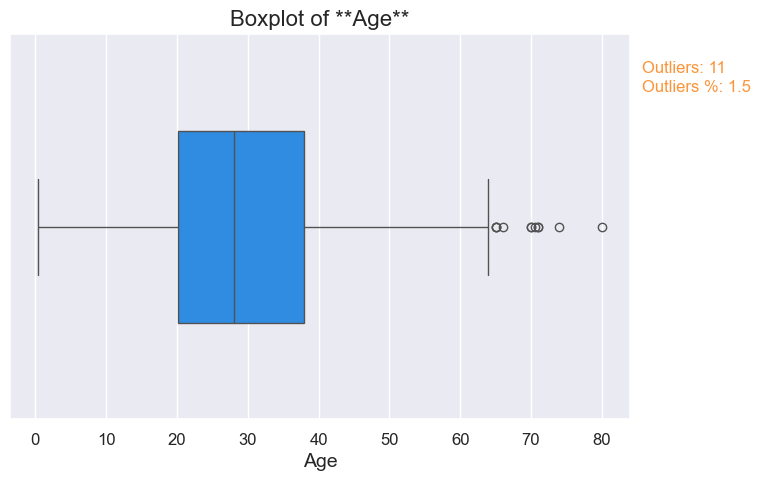

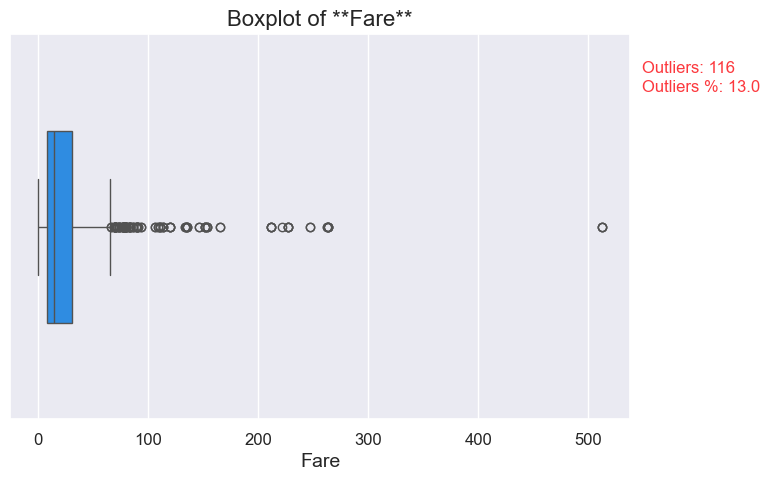

In [130]:
explore_outliers(data=df, columns=numerical_cols)

### **Explore univariate distributions**

> - **<u>Discrete</u> distributions**
> - **<u>Continuous</u> distributions**

##### <u>Discrete</u> distributions

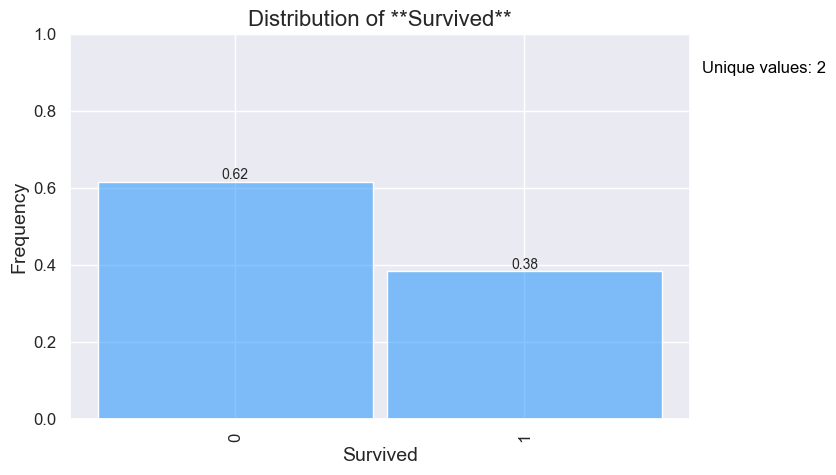

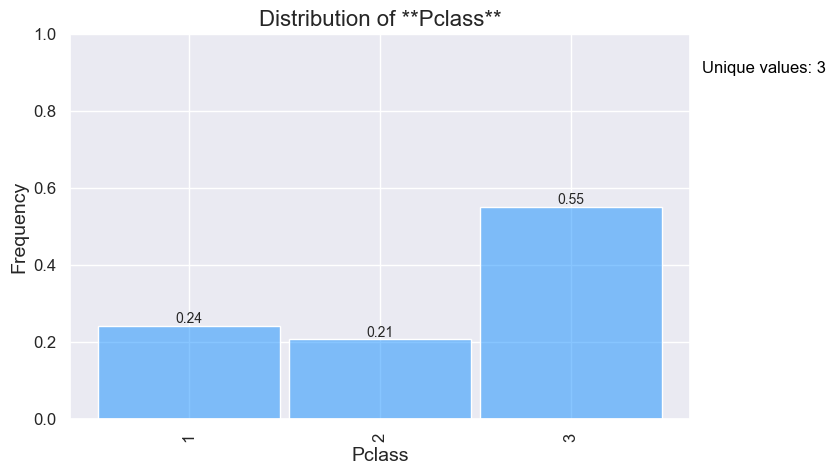

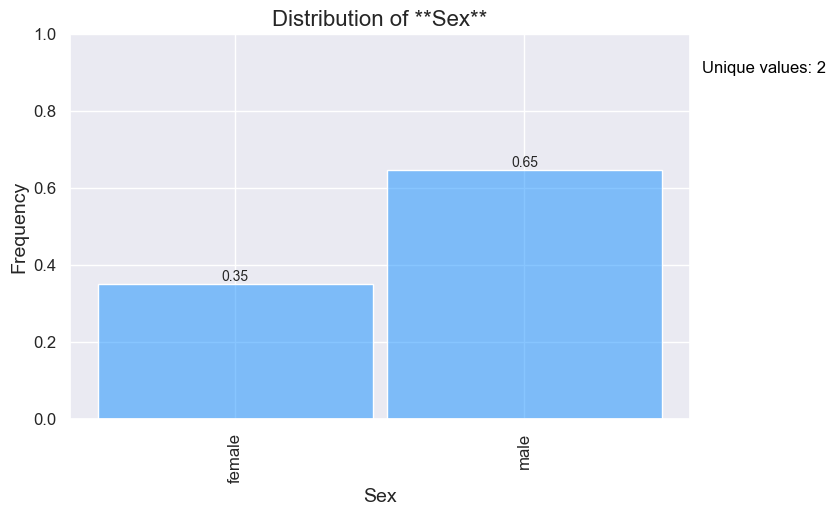

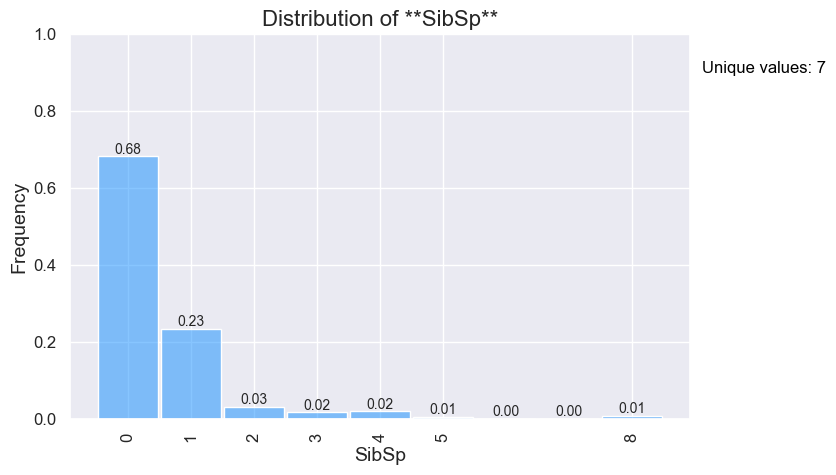

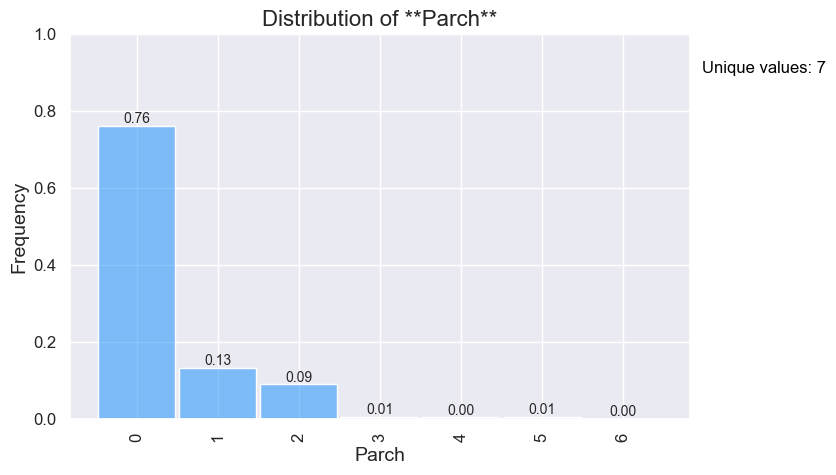

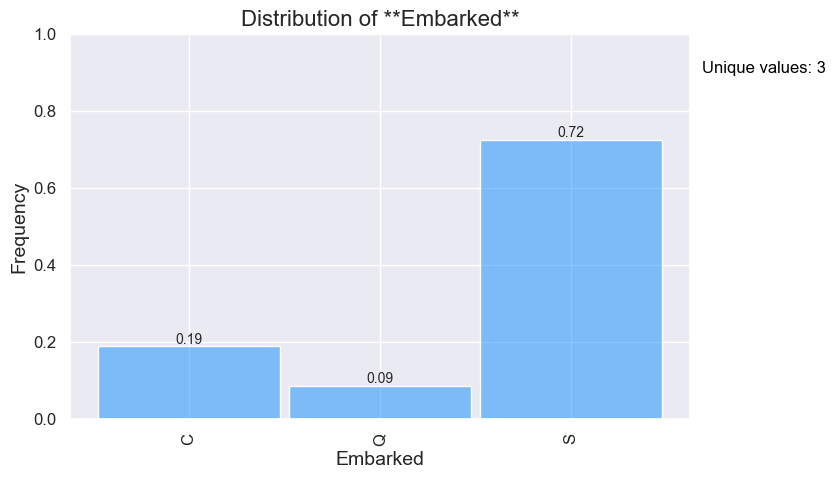

In [131]:
explore_univariate(
    data=df, columns=categorical_cols, dist_type="discrete", relative_frequency=True
)

##### <u>Continuous</u> distributions

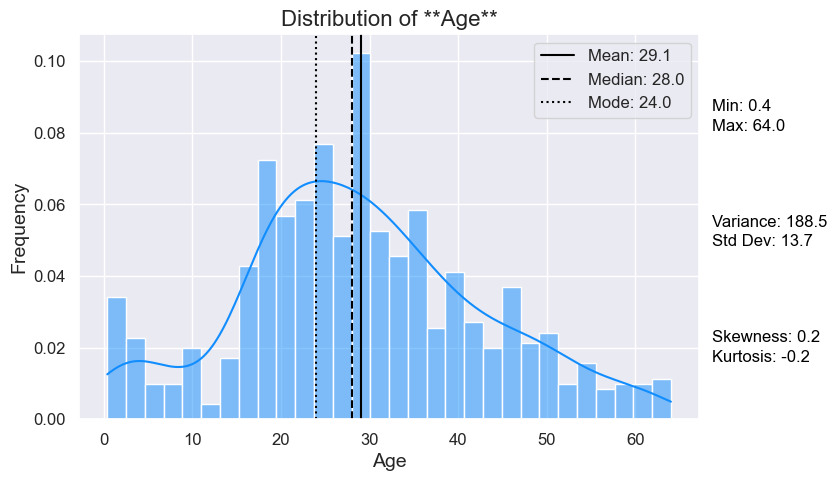

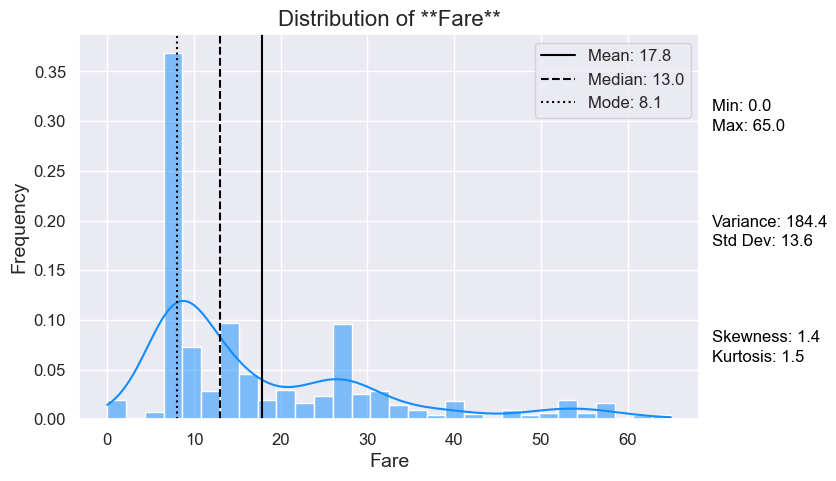

In [132]:
explore_univariate(
    data=df,
    columns=numerical_cols,
    dist_type="continuous",
    n_bins=30,
    remove_outliers=True,
)

### **Excursus: Sweetviz Library**

In [133]:
%pip install sweetviz

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.3.2 -> 24.2
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [134]:
import sweetviz as sv

In [135]:
#report = sv.analyze(df)
#report.show_html('sweetviz_report.html')

### **Explore bivariate relationships**

**Continuous features**


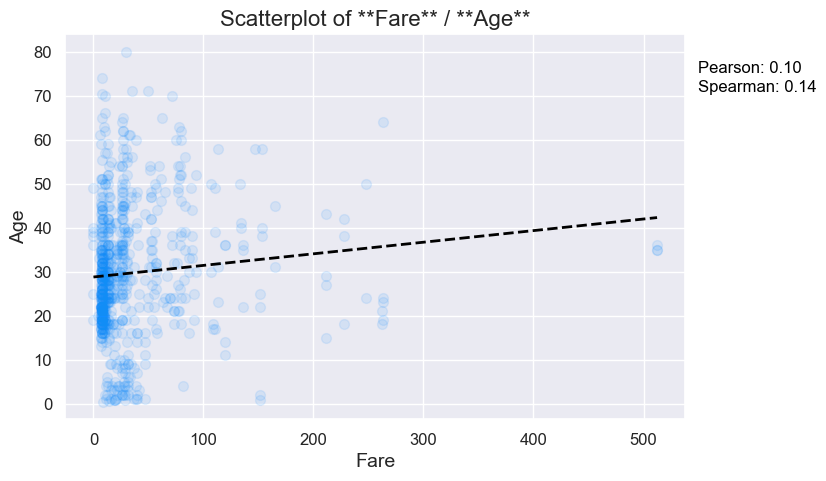

**Discrete features**


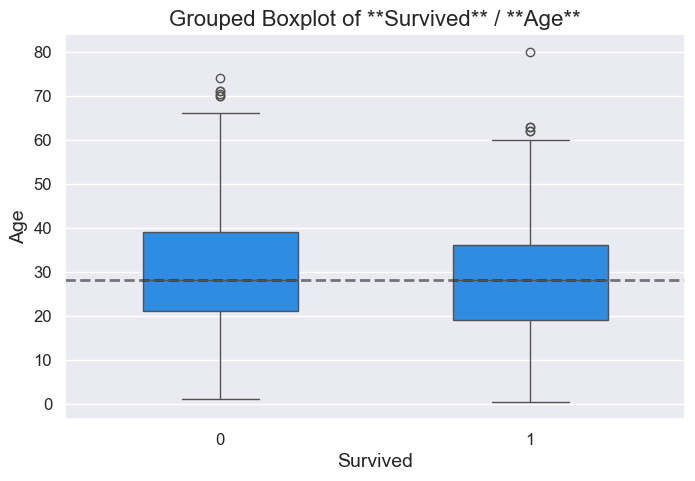

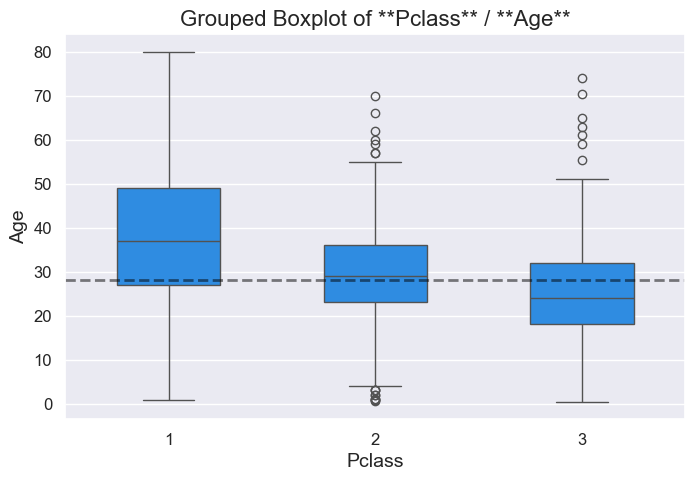

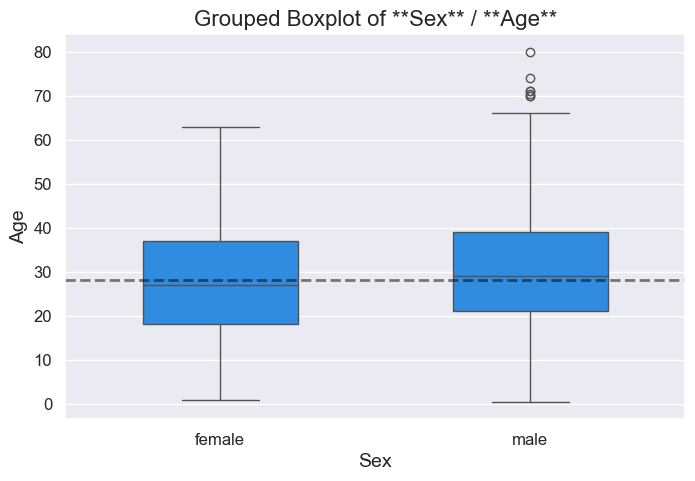

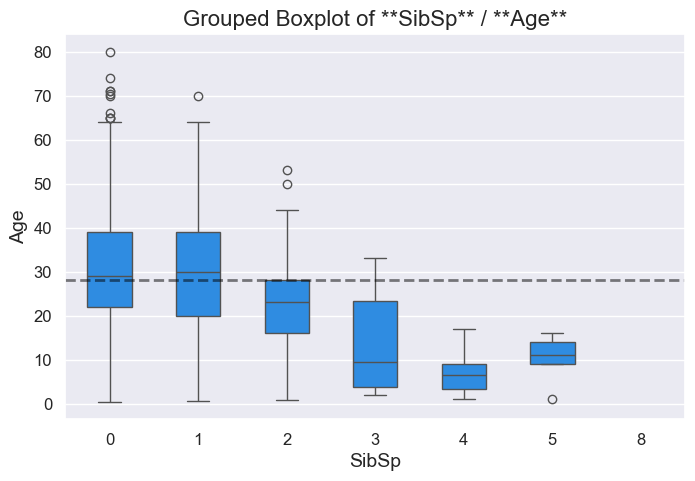

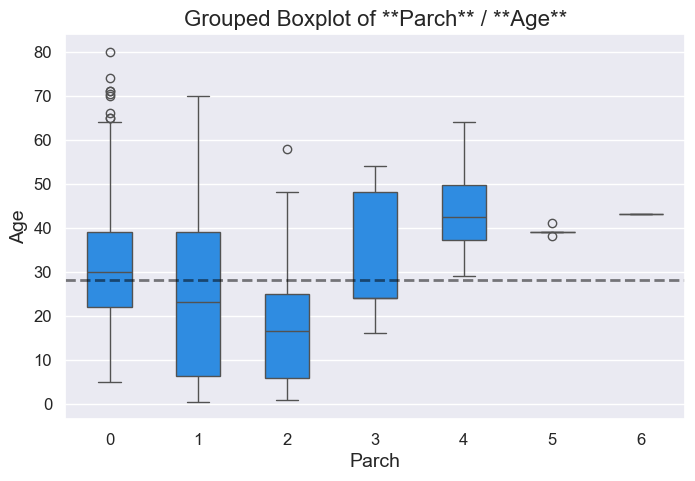

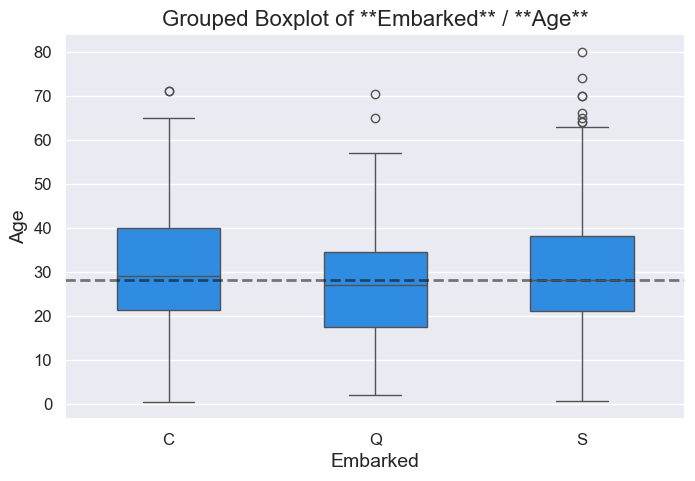

In [136]:
explore_bivariate_relationships(
    data=df,
    categorical_columns=categorical_cols,
    numerical_columns=numerical_cols,
    y_column="Age",
    y_type="continuous",
)

### **Explore multivariate relationships**